In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [4]:
car = pd.read_csv("C:\\Users\\hp\\Downloads\car data.csv")
car.info

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\hp\AppData\Local\Temp\ipykernel_9164\4185770763.py:1: SyntaxWarning: invalid escape sequence '\c'
  car = pd.read_csv("C:\\Users\\hp\\Downloads\car data.csv")


<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [5]:
print(car)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [6]:
car.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [7]:
fuel_type = car['Fuel_Type']
seller_type = car['Selling_type']
transmission_type = car['Transmission']
selling_price = car['Selling_Price']

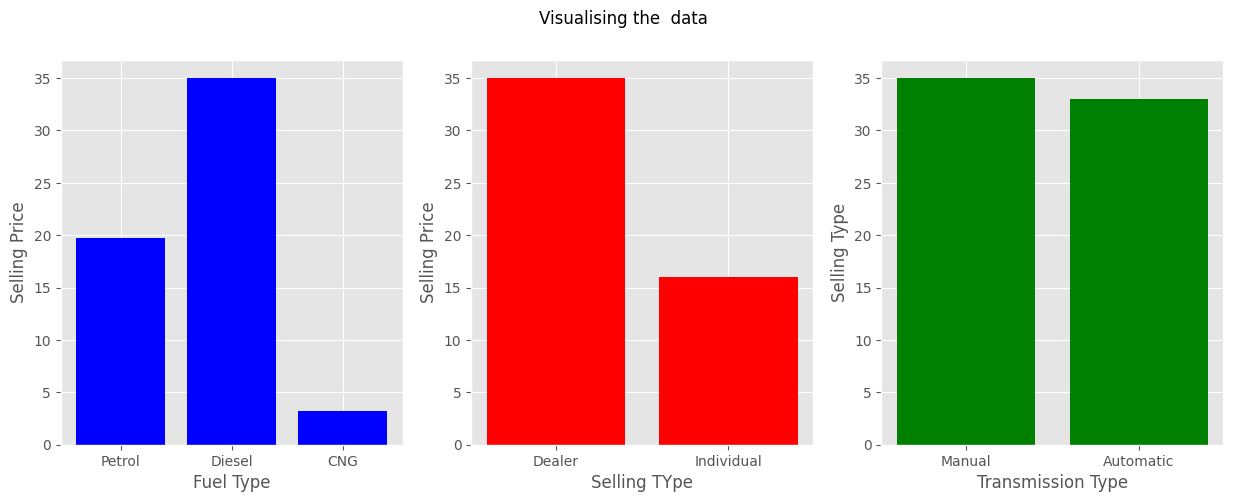

In [8]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualising the  data')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color = 'blue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color = 'red')
plt.xlabel("Selling TYpe")
plt.ylabel("Selling Price")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color = 'green')
plt.xlabel("Transmission Type")
plt.ylabel("Selling Type")
plt.show()

In [9]:
#gathering the individual statistical data

petrolCar_data = car.groupby('Fuel_Type').get_group('Petrol')
petrolCar_data.describe

<bound method NDFrame.describe of      Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0        ritz  2014           3.35           5.59       27000    Petrol   
2        ciaz  2017           7.25           9.85        6900    Petrol   
3     wagon r  2011           2.85           4.15        5200    Petrol   
6        ciaz  2015           6.75           8.12       18796    Petrol   
10   alto 800  2017           2.85           3.60        2135    Petrol   
..        ...   ...            ...            ...         ...       ...   
293      city  2010           3.25           9.90       38000    Petrol   
294     amaze  2014           3.75           6.80       33019    Petrol   
297      brio  2015           4.00           5.90       60000    Petrol   
298      city  2009           3.35          11.00       87934    Petrol   
300      brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Man

In [10]:
diselCar_data = car.groupby('Fuel_Type').get_group('Diesel')
diselCar_data.describe

<bound method NDFrame.describe of           Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
1              sx4  2013           4.75           9.54       43000    Diesel   
4            swift  2014           4.60           6.87       42450    Diesel   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
9             ciaz  2015           7.45           8.92       42367    Diesel   
11            ciaz  2015           6.85          10.38       51000    Diesel   
15          ertiga  2016           7.75          10.79       43000    Diesel   
16          ertiga  2015           7.25          10.79       41678    Diesel   
17          ertiga  2016           7.75          10.79       43000    Diesel   
29            ciaz  2015           7.45          10.38       45000    Diesel   
30    

In [11]:
CNGCar_data = car.groupby('Fuel_Type').get_group('CNG')
CNGCar_data.describe

<bound method NDFrame.describe of    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
18  wagon r  2015           3.25           5.09       35500       CNG   
35      sx4  2011           2.95           7.74       49998       CNG   

   Selling_type Transmission  Owner  
18       Dealer       Manual      0  
35       Dealer       Manual      0  >

In [12]:
sellerType_data = car.groupby('Selling_type').get_group('Dealer')
sellerType_data.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  

In [13]:
#Manually encodeing  the  data
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
car.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [14]:
# One-hot encoding [is a technique used to convert categorical data into a numerical format]

car = pd.get_dummies(car, columns=['Selling_type', 'Transmission'], drop_first=True)
print(car.head())            

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Owner  \
0     ritz  2014           3.35           5.59       27000          0      0   
1      sx4  2013           4.75           9.54       43000          1      0   
2     ciaz  2017           7.25           9.85        6900          0      0   
3  wagon r  2011           2.85           4.15        5200          0      0   
4    swift  2014           4.60           6.87       42450          1      0   

   Selling_type_Individual  Transmission_Manual  
0                    False                 True  
1                    False                 True  
2                    False                 True  
3                    False                 True  
4                    False                 True  


In [15]:
#Number of cars in each fuel type
print(car['Fuel_Type'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64


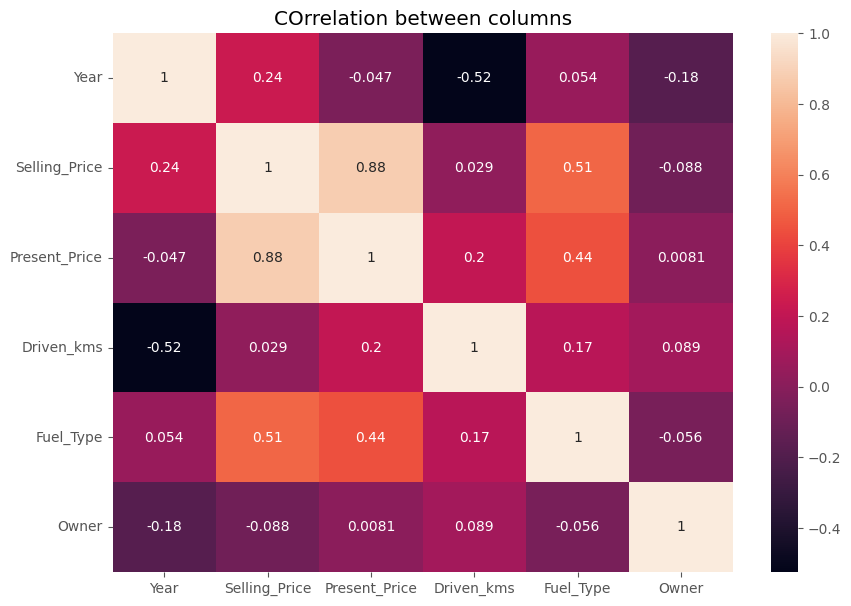

In [16]:
#representing in the form of HEATMAP

numeric_car = car.select_dtypes(include=[np.number])
plt.figure(figsize = (10,7))
sns.heatmap(numeric_car.corr(),annot = True)
plt.title("COrrelation between columns")
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

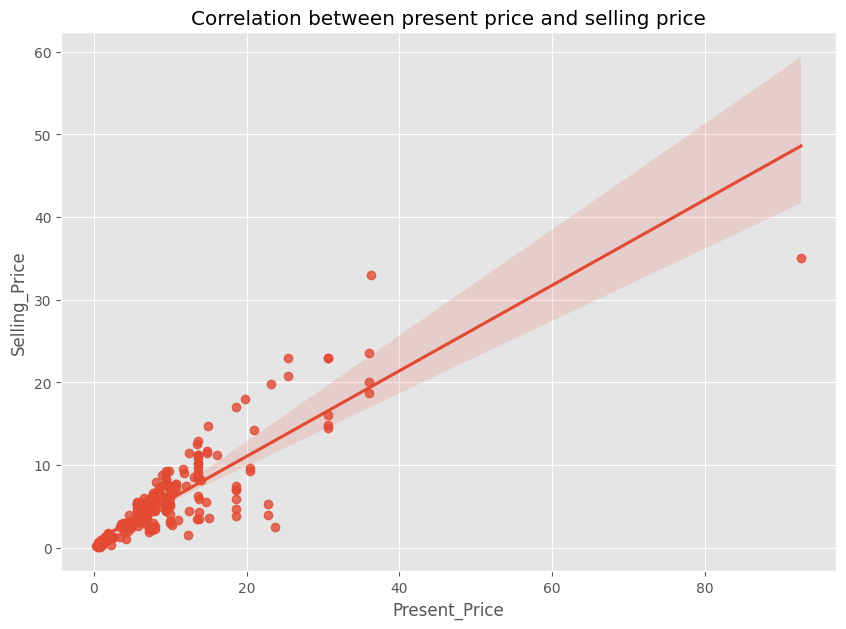

In [17]:
fig = plt.figure(figsize = (10,7))
plt.title("Correlation between present price and selling price")
sns.regplot(x = 'Present_Price',y = 'Selling_Price',data = car)

In [18]:
x =  car.drop(['Car_Name','Selling_Price'],axis = 1)
y = car['Selling_Price']  


In [19]:
print("shape of X: " ,x.shape)
print("Shape of Y : ", y.shape)

shape of X:  (301, 7)
Shape of Y :  (301,)


In [20]:
#Splitting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =42)

In [21]:
print("X Train shape",x_train.shape)
print("Y Train shape",y_train.shape)
print("X test shape",x_test.shape)
print("y test shape",y_test.shape)

X Train shape (210, 7)
Y Train shape (210,)
X test shape (91, 7)
y test shape (91,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model = LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
pred = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics

In [28]:
print("MAE: ", metrics.mean_absolute_error(pred, y_test))
print("MSE: ", metrics.mean_squared_error(pred, y_test))
print("R2 Score: ", metrics.r2_score(y_test, pred))

MAE:  1.2581987927234457
MSE:  3.4953688860134586
R2 Score:  0.877244354016641


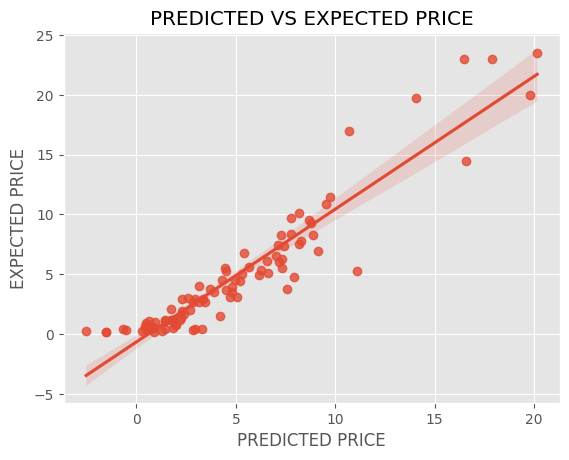

In [29]:
sns.regplot(x = pred,y = y_test)
plt.xlabel("PREDICTED PRICE")
plt.ylabel("EXPECTED PRICE")
plt.title("PREDICTED VS EXPECTED PRICE")
plt.show()